In [1]:
# 일단 import
%matplotlib inline

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [2]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

!apt-get update -qq
!apt-get install fonts-nanum* -qq

3.10.0
/usr/local/lib/python3.11/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib
sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-I

In [3]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 56
nanum_font number: 39


In [4]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다

current_font()

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

Python 3.11.11
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0
NanumGothic Eco


In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.findSystemFonts()  # 시스템에 설치된 폰트 목록 업데이트
plt.rcParams.update({'font.sans-serif': ['Arial', 'NanumGothic', 'Malgun Gothic']})  # 원하는 폰트 설정

In [6]:
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [8]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
from sklearn.mixture import GaussianMixture
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

In [10]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [
     [0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]
    ]
)

blob_std = np.array(
    [0.4, 0.3, 0.1, 0.1, 0.1]
)

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

## 9.2 가우시안 혼합

가우시안 혼합 모델(GMM)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델임. 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성한다.

각 클러스터는 타원의 모양, 크기, 밀집도가 다르다. 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었단 것을 안다. 하지만 어떤 분포인지, 이 분포의 파라미터는 무엇인지 알지 못한다.

In [11]:
# 여러 GMM 변종이 있는데, 가장 간단한 버전= GaussianMixture에 구현

from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10) # 데이터가 3개의 군집으로 나뉜다고 가정, GMM을 10번의 초기화 실행하고 가장 좋은 파라미터를 찾는다는 의미!
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

다음은 이 알고리즘이 추정한 파라미터임

In [12]:
gm.weights_ # 데이터를 생성하기 위해 사용한 가중치

array([0.19978216, 0.20032189, 0.59989596])

In [13]:
gm.means_

array([[-1.48543693,  2.28573643],
       [ 0.19937187,  2.25813691],
       [-2.80278963,  1.96665812]])

In [14]:
gm.covariances_

array([[[ 8.79984367e-02,  1.46541758e-04],
        [ 1.46541758e-04,  9.01630979e-02]],

       [[ 1.46166449e-01, -4.84946828e-03],
        [-4.84946828e-03,  1.56280672e-01]],

       [[ 9.95376970e-03,  7.16529541e-04],
        [ 7.16529541e-04,  3.96947649e-01]]])

In [15]:
gm.converged_ # 수렴했는지

True

In [16]:
gm.n_iter_ #반복횟수 (각각의 초기화에서의 수렴할 때까지의 반복횟수 총합)

3

In [17]:
gm.predict(X)

array([2, 2, 1, ..., 2, 1, 2])

In [18]:
gm.predict_proba(X)

array([[1.19140197e-006, 5.11211601e-015, 9.99998809e-001],
       [1.56262666e-006, 6.43557803e-016, 9.99998437e-001],
       [7.51207529e-016, 1.00000000e+000, 4.58103106e-307],
       ...,
       [8.44387449e-006, 7.53349575e-015, 9.99991556e-001],
       [7.54961300e-008, 9.99999925e-001, 6.39866293e-202],
       [2.66779387e-004, 3.59569371e-013, 9.99733221e-001]])

In [19]:
X_new, y_new = gm.sample(6)
X_new

array([[-1.18900121,  2.57605881],
       [-1.59389492,  2.04046674],
       [-2.7050811 ,  2.1751864 ],
       [-2.82187027,  1.66479453],
       [-2.92341588,  1.26984623],
       [-2.6665409 ,  2.47832958]])

In [20]:
y_new

array([0, 0, 2, 2, 2, 2])

In [21]:
gm.score_samples(X) # 주어진 위치에서의 밀도 추정 가능 (점수 높을수록 밀도 높음)

array([-0.62897413,  0.13004267, -7.15363365, ..., -0.3150245 ,
       -1.62809493, -0.94509528])

## 9.2.1 가우시안 혼합을 사용한 이상치 탐지

밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음. 여기서의 4는 밀도가 낮은 지역에 있는 샘플의 4%를 얻을 수 있다는 것임. 만약 거짓 양성이 너무 많다면 (즉 완벽하게 정상인데 결험으로 잘못 표시됐다면) 밀도 임곗값을 낮추면 됨

In [22]:
densities = gm.score_samples(X)

In [23]:
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

## 9.2.2 클러스터 개수 선택하기

k-평균처럼 가우시안혼합 알고리즘도 클러스터의 개수를 지정해야 한다. k-평균에서는 이너셔나 실루엣점수를 이용하지만, 가우시안혼합에서는 사용 불가하다. 대신 정의된 **BIC나 AIC같은 이론적 정보 기준**을 최소화하는 모델을 찾는다.

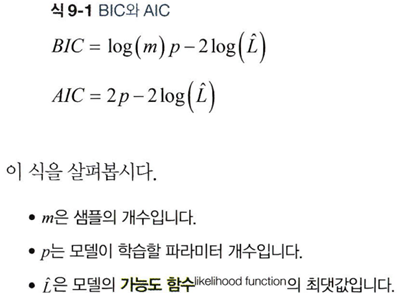

In [24]:
gm.bic(X)

np.float64(5168.669155929094)

In [25]:
gm.aic(X)

np.float64(5073.453814116879)

## 9.2.3 베이즈 가우시안 혼합 모델

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 베이즈 가우시안 혼합 클래스를 사용할 수 있다.

클러스터 개수 (n_components)를 최적의 클러스터 개수보다 크다고 믿을만한 값으로 지정. 단 현재 문제에 대해 최소한의 정보를 가지고 있다고 가정

In [26]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.2, 0. , 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0. , 0. ])

알고리즘이 자동으로 3개의 클러스터가 필요하다는 것을 감지함